In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv").iloc[:,1:]
pd.set_option("display.max_columns", None)
df.head()

,sex,bmi,children,smoker,region,charges
0,female,27.900,0,yes,southwest,16884.92400
1,male,33.770,1,no,southeast,1725.55230
2,male,33.000,3,no,southeast,4449.46200
3,male,22.705,0,no,northwest,21984.47061
4,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,sex,bmi,children,smoker,region,charges
0,female,27.900,0,yes,southwest,16884.92400
1,male,33.770,1,no,southeast,1725.55230
2,male,33.000,3,no,southeast,4449.46200
3,male,22.705,0,no,northwest,21984.47061
4,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1337, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1337 non-null   object 
 1   bmi       1337 non-null   float64
 2   children  1337 non-null   int64  
 3   smoker    1337 non-null   object 
 4   region    1337 non-null   object 
 5   charges   1337 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 62.8+ KB


In [ ]:
df.nunique()

sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

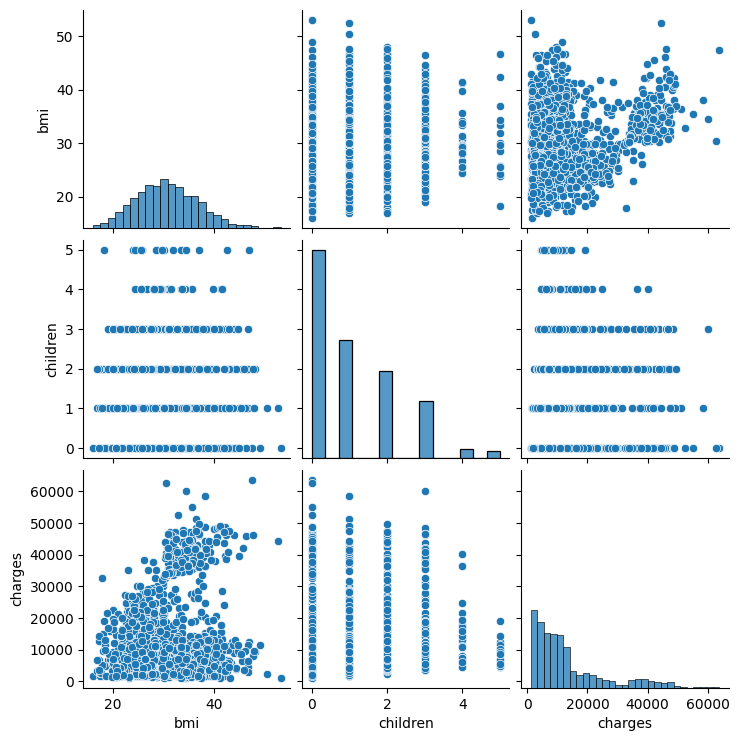

In [ ]:
sns.pairplot(data = df)

In [ ]:
df.describe()
df

,sex,bmi,children,smoker,region,charges
0,female,27.900,0,yes,southwest,16884.92400
1,male,33.770,1,no,southeast,1725.55230
2,male,33.000,3,no,southeast,4449.46200
3,male,22.705,0,no,northwest,21984.47061
4,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
1332,male,30.970,3,no,northwest,10600.54830
1333,female,31.920,0,no,northeast,2205.98080
1334,female,36.850,0,no,southeast,1629.83350
1335,female,25.800,0,no,southwest,2007.94500


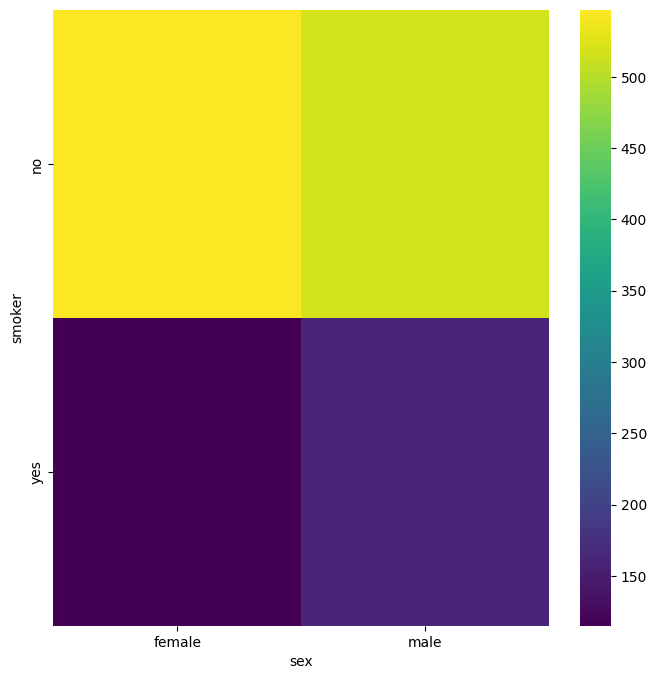

In [ ]:
# @title sex vs smoker

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

Como se puede apreciar, la proporción de fumadores vs no fumadores es muy pareja entre los hombres y las mujeres de la muestra

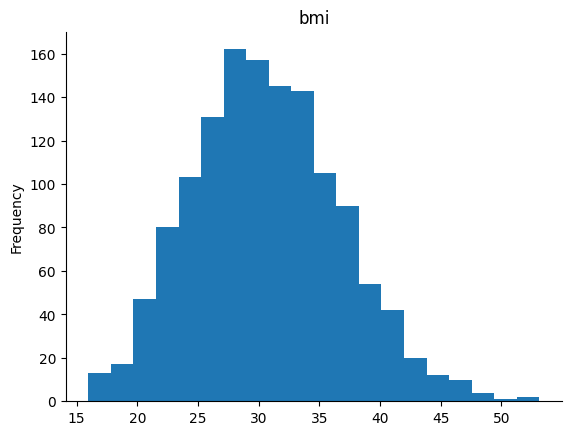

In [ ]:
# @title bmi

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

Tal y como era de esperar, el índice de masa corporal de las personas que forman parte de esta base de datos tiene una distribución normal. Por otra parte, dado que los datos considerados normales se encuentran entre 18,5 y 25, puede verse que la gran mayoría de las personas tienen sobrepeso.

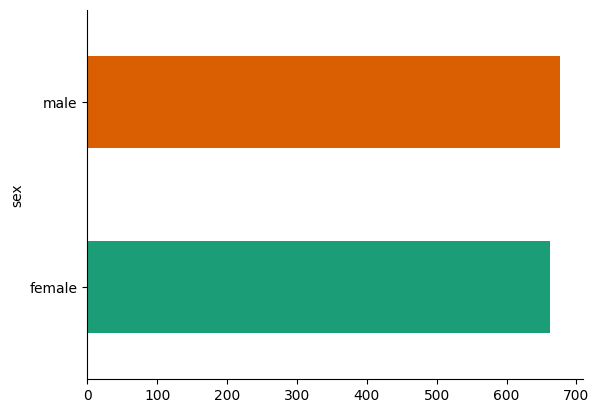

In [ ]:
# @title sex

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

En cuanto a la proporción de hombres y mujeres vemos que es muy cercana al 50%, y por tanto muy cercana a la proporción global. Esto es beneficioso para nuestro análisis, pues nos ahorramos el paso de tener que austar el análisis que hagamos a una posible desproporción

In [5]:
# Separo charges, que es la variable objetivo (cuánto le están cobrando a los clientes)
X = df.drop("charges", axis=1)
y = df["charges"]

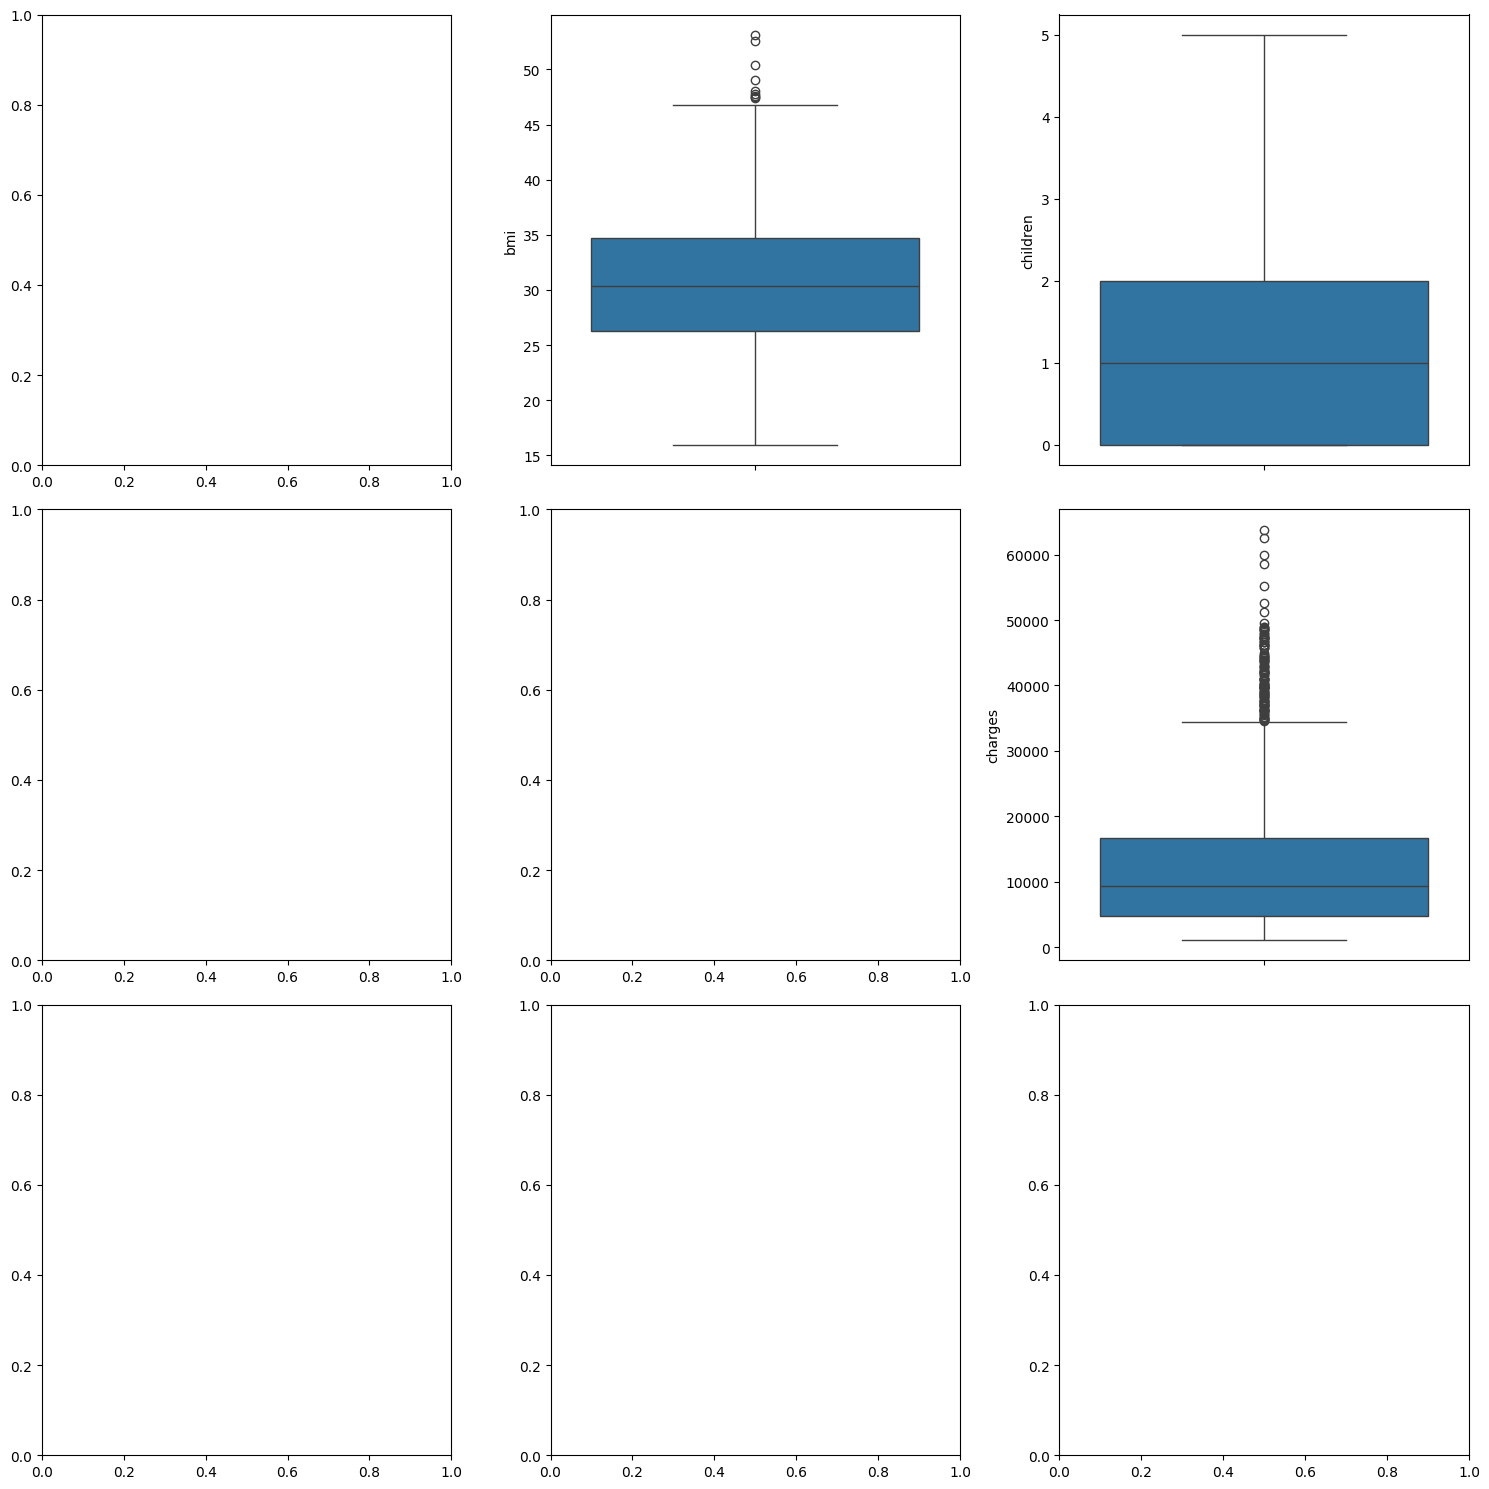

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))


sns.boxplot(ax = axes[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = df, y = "children")
sns.boxplot(ax = axes[1, 2], data = df, y = "charges")


plt.tight_layout()

plt.show()

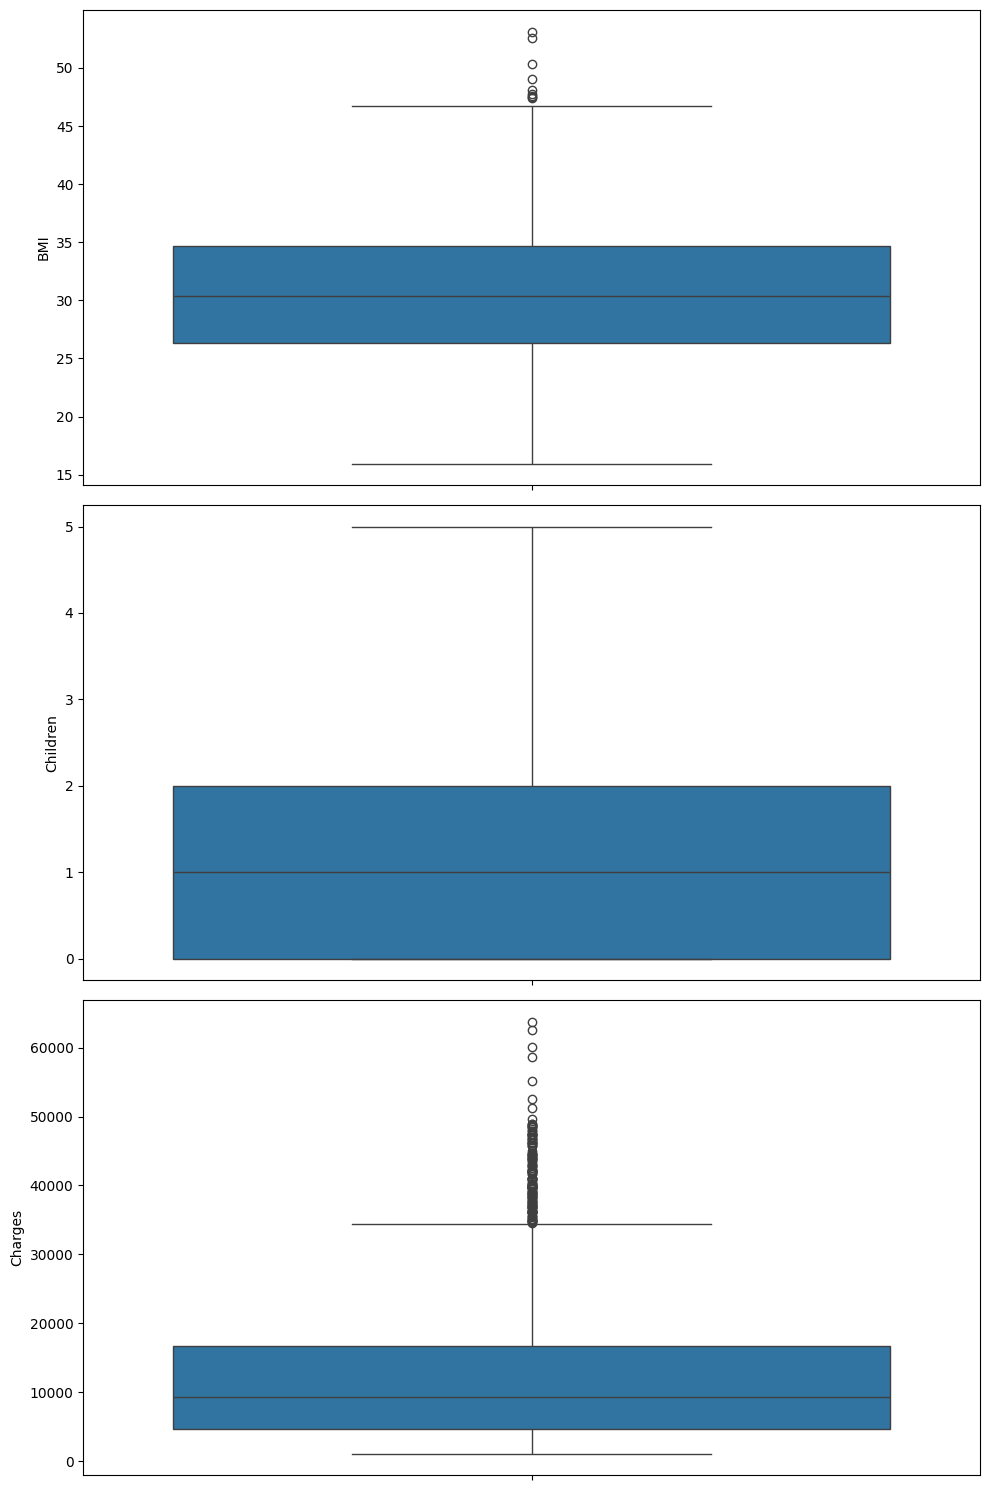

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Creamos una lista con datos y otra con los títulos para los boxplots
data = [df["bmi"], df["children"], df["charges"]]
labels = ["BMI", "Children", "Charges"]

# Iterar sobre los ejes y datos para graficar los boxplots
for ax, data, label in zip(axes, data, labels):
    sns.boxplot(ax=ax, data=data)
    ax.set_ylabel(label)
plt.tight_layout()

# Y mostramos el gráfico
plt.show()

In [7]:
price_stats = df["charges"].describe()
price_stats

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [6]:
#Uso pd.get_dummies para pasarme las no numéricas a numéricas
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)


In [7]:
#Y a lasa variables numéricas les aplico minmaxscaler
scaler = MinMaxScaler()
numeric_cols = ["bmi", "children", "charges"]  # Escala solo variables numéricas
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("charges", axis=1)  # Variables predictoras
y = df["charges"]  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.08695397718475961
MSE: 0.011905727880501624
R2: 0.6990114352316632


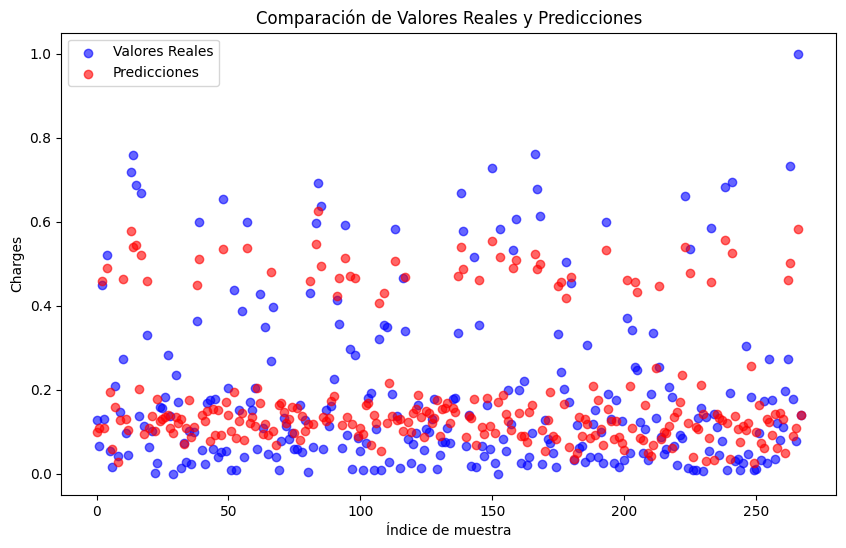

In [12]:
# Después de mil años, esta es la manera de sacar los valores reales en azul y las predicciones en rojo
#Creo que, teniendo en cuenta que esto es simplemente una regresión lineal, los resultados son bastante decentes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicciones', alpha=0.6)
plt.title("Comparación de Valores Reales y Predicciones")
plt.xlabel("Índice de muestra")
plt.ylabel("Charges")
plt.legend()
plt.show()